## Locally Weighted Linear Regression

## Logistic Regression

In [50]:
import numpy as np
rng = np.random.default_rng()

N = 100
sigma = 2
px = 5
X = np.r_[(-px + sigma * rng.standard_normal(N)),
        (px + sigma * rng.standard_normal(N))].reshape(-1 ,1)
rng.shuffle(X)
X = np.hstack( [X, np.ones((X.shape[0], 1))] )
X

array([[-4.70535403,  1.        ],
       [-7.65604951,  1.        ],
       [ 8.8073943 ,  1.        ],
       [ 4.48607457,  1.        ],
       [-0.55010649,  1.        ],
       [ 0.86261258,  1.        ],
       [-6.29614156,  1.        ],
       [-6.01874407,  1.        ],
       [ 3.15125746,  1.        ],
       [ 5.92130671,  1.        ],
       [ 5.76370477,  1.        ],
       [-3.65270791,  1.        ],
       [ 3.53545207,  1.        ],
       [-3.32325624,  1.        ],
       [-5.58191557,  1.        ],
       [ 6.11795121,  1.        ],
       [ 4.74031919,  1.        ],
       [-3.81517962,  1.        ],
       [-7.44926283,  1.        ],
       [-8.06194379,  1.        ],
       [-3.21503537,  1.        ],
       [-4.63032241,  1.        ],
       [-4.59432329,  1.        ],
       [-6.13668151,  1.        ],
       [ 2.97583161,  1.        ],
       [-4.59723666,  1.        ],
       [-9.51032486,  1.        ],
       [-4.52447554,  1.        ],
       [-5.79721151,

In [51]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hypothesis(x, theta):
    return sigmoid( x @ theta )

def log_p_single(y, x, theta):
    h = hypothesis(x, theta)
    eps = 1e-10
    h = np.clip(h, eps, 1 - eps)  # 限制 h 在 (eps, 1-eps) 之间
    res = y * np.log(h) + (1 - y) * np.log(1 - h)
    return res

def log_likelihood(theta):
    return np.sum( log_p_single( y, X, theta ), axis=0 )

In [ ]:
y = rng.random((X.shape[0], 1)) < sigmoid(X[:, 0]).reshape(-1, 1)
y

array([[False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

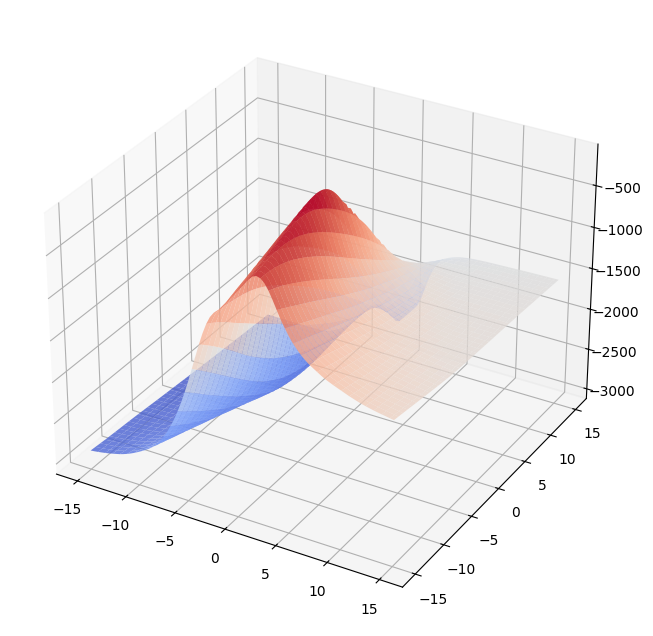

In [53]:
from matplotlib import pyplot as plt
cx, cy = 0, 0
r = 15
gx, gy = np.mgrid[cx-r:cx+r:80j, cy-r:cy+r:80j]
gz = log_likelihood(np.vstack([gx.ravel(), gy.ravel()])).reshape(gx.shape)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(
    gx, gy, gz,
    cmap=plt.cm.coolwarm,  # 使用冷热色系
    rstride=2,             # 行步长（控制网格密度）
    cstride=2,             # 列步长
    alpha=0.8,             # 透明度
    linewidth=0.5,         # 网格线宽
    antialiased=True       # 抗锯齿
)

In [54]:
def grad(theta):
    h = hypothesis(X, theta)
    return X.T @ (y - h)

theta = np.zeros((2, 1))
alpha = 0.002
for i in range(10000):
    theta += alpha * grad(theta)

(-theta[1] / theta[0]).item()

8.911566750831732